In [1]:
from __future__ import division
from sympy import *
import time
import matplotlib.pyplot as plt
%matplotlib inline

def fixfloat(vec):
    return list(map(lambda i: '%0.4f' % i, vec))

# Exercise 1: Analytical Integration

Consider the functions

$f(x) = -4 \; x \; (x - 1) \label{ffunc} $

and

$g(x) = \frac{8}{9} \cdot (-16\;x^4 + 40\;x^3 -35\;x^2 + 11\;x)$

Compute the antiderivatives and evaluate the integrals.


In [5]:
from __future__ import division
from sympy import *
x, y = symbols('x y')
l, i = symbols('l, i', integer=True)
g, h = symbols('f g', cls=Function)

In [6]:
# Define symbolic functions: f, intf (i.e, the function and its integral). You can use
# integrate(func, var)
f = -4 * x * (x-1)
intf = integrate(f, x)

print(intf)
print(integrate(f,(x,0,1)))

-4*x**3/3 + 2*x**2
2/3


In [7]:
# Define symbolic functions: g, intg (i.e, the function and its integral). You can use
# integrate(func, var)
g = 8 * (-16*x**4 + 40*x**3 - 35*x**2 + 11*x) / 9
intg = integrate(g,x)

print(intg)
print(integrate(g,(x,0,1)))


-128*x**5/45 + 80*x**4/9 - 280*x**3/27 + 44*x**2/9
76/135


# Exercise 2: Composite Trapezoidal Rule

Write a function that approximates the integral via the Composite Trapezoidal Rule.
Complete the function template, with $a$, $b$ and $f$ according to the definition above and $n$ being the number of trapezoids used.

In [8]:
def trapezoidalRule(f, a, b, n):
    '''
    Implements CTR to approximate the integral of a given function. 
        F ~= T = (b-a) * (f(a)+f(b))/2
    '''
    integral = 0.0
    dh = (b-a)/float(n) # define interval base length
    
    # Calculate the integral.
    # for every interval do...
    for i in range(n):
        l = a + i*dh
        r = l + dh
        integral += dh * (f(l) + f(r)) * 0.5
    
    return integral
    

In [9]:
integ = trapezoidalRule(lambda t: f.subs(x, t), 0.0, 1.0, 1000)
print('CTR intf =',integ)
print('Analytic = ', float(2/3))

integ = trapezoidalRule(lambda t: g.subs(x, t), 0.0, 1.0, 1000)
print('\nCTR intg =',integ)
print('Analytic = ', float(76/135))

CTR intf = 0.666666000000000
Analytic =  0.6666666666666666

CTR intg = 0.562961925926402
Analytic =  0.562962962962963


# Optional: Composite Simpson Rule

Do the same as in Exercise 2 for the Composite Simpson Rule.

In [10]:
def simpsonRule(f, a, b, n):
    '''
    Implements SR to approximate the integral of given function.
        F ~= S = (b-a) * (f(a) + f(b) + 4*f(m)) / 6, where m = (a+b)/2
    '''
    
    integral = 0.0
    dh = (b-a)/float(n)
    
    # Calculate the integral.
    for i in range(n):
        l = a + i*dh
        r = l + dh
        m = (l + r) * 0.5
    
        integral += dh * (f(l) + f(r) + 4*f(m)) / 6
    
    return integral

In [11]:
integ = simpsonRule(lambda t: f.subs(x, t), 0.0, 1.0, 5)
print('\nSR intf =',integ)
print('Analytic = ', float(2/3))

integ = simpsonRule(lambda t: g.subs(x, t), 0.0, 1.0, 50)
print('\nSR intg =',integ)
print('Analytic = ', float(76/135))


SR intf = 0.666666666666667
Analytic =  0.6666666666666666

SR intg = 0.562962944000001
Analytic =  0.562962962962963


# Exercise 3: Archimedes' Hierarchical Approach

In this exercise we will use Archimedes' approach to approximate the integral.

Let $\vec{u} = [u_0,\dots,u_{n-1}]^T \in {\mathbb R}^n, n = 2^l - 1, l \in {\mathbb N}$ a vector of function values with
$u_i = f(x_i = \frac{i + 1}{2^l})$.

<b>a)</b>
Write a function that transforms a given vector $\vec{u} \in {\mathbb R}^n$ to a similar vector 
$\vec{v} \in {\mathbb R}^n$ containing the hierarchical coefficients needed for Archimedes' quadrature approach.
Use the function template below.

<b>b)</b>
Having computed the vector $\vec{v}$ with the hierarchical coefficients, implement a function evaluating
the integral.

<b>c)</b>
Write a function <b>dehierarchize1d</b> similar to <b>hierarchize1d</b> that computes the inverse of the
transformation above.

<b>NOTE:</b>
We always assume a ZERO boundary case. And the domain is always $[0,1]$.

### Task a)

In [12]:
def hierarchize1d(u, maxlv):
    ''' 
    Basic algorithm:
    -----------------
    for l = maxlevel..1 :
        delta = 2**(maxl - l)   # detla is indeed the index interval between mid-point and end-point
        for j = index of every point of level l:
            v[j] = u[j] - 0.5*(u[j-delta] + u[j+delta])  
    '''
    
    v = list(u)
    N = len(u)
    
    for lv in range(maxlv, 1, -1):   # no need to include level=1, bc v[j] = u[j] at level 1
        delta = 2**(maxlv - lv)      # index interval between mid-point and end-point
        first = 2**(maxlv - lv) - 1  # first point index of current level
        
        for j in range(first, N, 2*delta):
            #v[j] = u[j] - 0.5 * (u[j-delta] + u[j+delta]) <--- cannot do this directly
            # we need to make sure index not out of bound
            
            v[j] = u[j]
            
            if (j-delta >= 0):
                v[j] -= 0.5 * u[j-delta]
                
            if (j+delta < N):
                v[j] -= 0.5 * u[j+delta]
    
    return v

In [13]:
def hierarchize1d_efficient(u, maxl):

    '''
    Bitwise operation:
    ------------------
    x << y : equivalent to (x * 2**y)
    x >> y : equivalent to (x / 2**y)
    '''

    '''
    Improved algorithm:
    -------------------
    for l = maxlevel-1..2
    
        We update the grid points of l+1
        We get rid of conditionals inside the for loop
    
        delta_next = 1 << (maxl-l-1)
        first_this = (1 << (maxl-l) - 1)
        
        for j = index of every point of level l:
            ....
    '''
    
    v = list(u)      # OUTPUT vector
    N = len(u)
    
    for l in range(maxl-1, 0, -1):
        
        delta_next = 1 << (maxl-l-1)    # delta of next level (l+1)
        first_this = (1<<(maxl-l)) - 1  # first point index of current level
        
        for j in range(first_this, N, delta_next<<1):
            v[j-delta_next] -= 0.5 * u[j]
            v[j+delta_next] -= 0.5 * u[j]
        
    return v

x = ['0.1250', '0.2500', '0.3750', '0.5000', '0.6250', '0.7500', '0.8750']
u = ['0.4375', '0.7500', '0.9375', '1.0000', '0.9375', '0.7500', '0.4375']
v = ['0.0625', '0.2500', '0.0625', '1.0000', '0.0625', '0.2500', '0.0625']


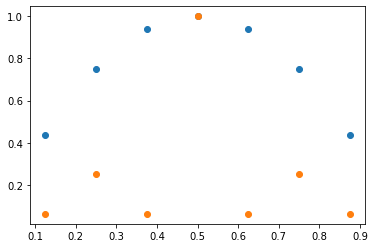

In [16]:
level = 3
xvec = []
for i in range(1, 2**level):
    xvec.append(i * 2**(-level))

uvec = list(map(lambda t: f.subs(x,t), xvec))

print("x =",fixfloat(xvec))
print("u =",fixfloat(uvec))

plt.scatter(xvec, uvec)

vvec = hierarchize1d(uvec, level)
print("v =",fixfloat(vvec))

plt.scatter(xvec, vvec)


In [30]:
# Basic vs Efficient implementation
tic = time.process_time()
v1 = hierarchize1d(uvec, level)
toc1 = time.process_time() - tic

tic = time.process_time()
v2 = hierarchize1d_efficient(uvec, level)
toc2 = time.process_time() - tic

print('Basic implementation v =', fixfloat(v1))
print('Exec time = ', toc1)

print('\nEfficient implementation v =', fixfloat(v2))
print('Exec time = ', toc2)

Basic implementation v = ['0.0625', '0.2500', '0.0625', '1.0000', '0.0625', '0.2500', '0.0625']
Exec time =  0.00038690199999980024

Efficient implementation v = ['0.0625', '0.2500', '0.0625', '1.0000', '0.0625', '0.2500', '0.0625']
Exec time =  0.0003025619999998952


### Task b)

In [13]:
def computeIntegral(v, maxlv):   
    integ = 0.0
    N = len(v)
    
    for lv in range(maxlv, 0, -1): # for all levels, including level=1
        delta = 2**(maxlv - lv)      # index interval between mid-point and end-point
        first = 2**(maxlv - lv) - 1  # first point index of current level
        half_base = 2**(-lv)         # length of half base
        
        for j in range(first, N, 2*delta):
            integ += v[j] * half_base
    
    return integ

In [14]:
integ = computeIntegral(vvec, level)
print('Archimedes intf =',integ)
print('Analytic = ', float(2/3))

Archimedes intf = 0.656250000000000
Analytic =  0.6666666666666666


### Task c)

In [15]:
def dehierarchize1d(v, maxlv):
    ''' 
    Basic algorithm:
    -----------------
    for l = 1..maxlevel :
        delta = 2**(maxl - l)   # detla is indeed the index interval between mid-point and end-point
        for j = index of every point of level l:
            u[j] = v[j] + 0.5*(v[j-delta] + v[j+delta])  
    '''
    
    u = list(v)
    N = len(v)
    
    #ToDo
    for l in range(1, maxlv+1):
        delta = 2**(maxlv - l)
        start = delta - 1
        for i in range(0, 2**l - 1, 2):
            position = start + i * delta
            assert(N > position >= 0)
            u[position] = v[position]
            if position - delta >= 0:
                u[position] += 0.5 * u[position - delta]
            if position + delta < N:
                u[position] += 0.5 * u[position + delta]
    return u

In [16]:
level = 3
xvec = []
for i in range(1, 2**level):
    xvec.append(i * 2**(-level))

uvec = list(map(lambda t: f.subs(x,t), xvec))

print("x =",fixfloat(xvec))
print("u =",fixfloat(uvec))

vvec = hierarchize1d(uvec, level)
print("v =",fixfloat(vvec))

u_compare = dehierarchize1d(vvec,level)
print("u_check =",fixfloat(u_compare))


x = ['0.1250', '0.2500', '0.3750', '0.5000', '0.6250', '0.7500', '0.8750']
u = ['0.4375', '0.7500', '0.9375', '1.0000', '0.9375', '0.7500', '0.4375']
v = ['0.0625', '0.2500', '0.0625', '1.0000', '0.0625', '0.2500', '0.0625']
u_check = ['0.4375', '0.7500', '0.9375', '1.0000', '0.9375', '0.7500', '0.4375']
